In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

from IPython import display
display.set_matplotlib_formats("svg")

import matplotlib.font_manager as font_manager
font_dir = ["/Users/dradecic/Desktop/IBM_Plex_Sans"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
    
plt.rcParams["figure.figsize"] = 12, 6
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 14
plt.rcParams["figure.titlesize"] = "xx-large"
plt.rcParams["xtick.labelsize"] = "medium"
plt.rcParams["ytick.labelsize"] = "medium"
plt.rcParams["font.family"] = "IBM Plex Sans"
plt.rcParams['axes.prop_cycle'] = cycler(color=["#101010"])
plt.rcParams['lines.linewidth'] = 2

/var/folders/_p/0615yhdd3nx3lvw2w2tnjvqw0000gn/T/ipykernel_77428/3064008642.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [3]:
df = pd.read_csv('LTOTALNSA.csv')
df.head()

,DATE,LTOTALNSA
0,1976-01-01,864.6
1,1976-02-01,973.3
2,1976-03-01,1216.1
3,1976-04-01,1163.2
4,1976-05-01,1176.1


In [4]:
df = pd.read_csv('LTOTALNSA.csv', index_col='DATE', parse_dates=True)
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


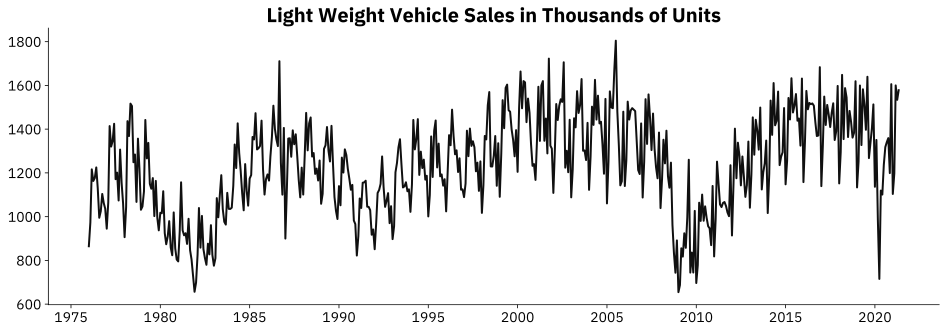

In [25]:
plt.figure(figsize=(16, 5))
plt.title('Light Weight Vehicle Sales in Thousands of Units', size=20, weight="bold")
plt.plot(df)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

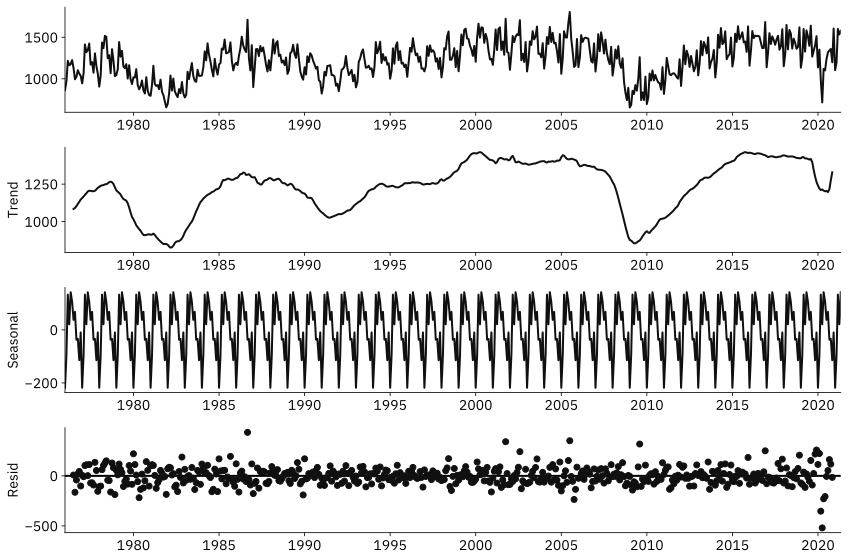

In [19]:
plt.rcParams['figure.figsize'] = 12, 8

seasonal_decompose(df).plot();

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
model = ExponentialSmoothing(
    endog=df['LTOTALNSA'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

/Users/dradecic/miniforge3/envs/tsa_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
forecasts = model.forecast(steps=24)

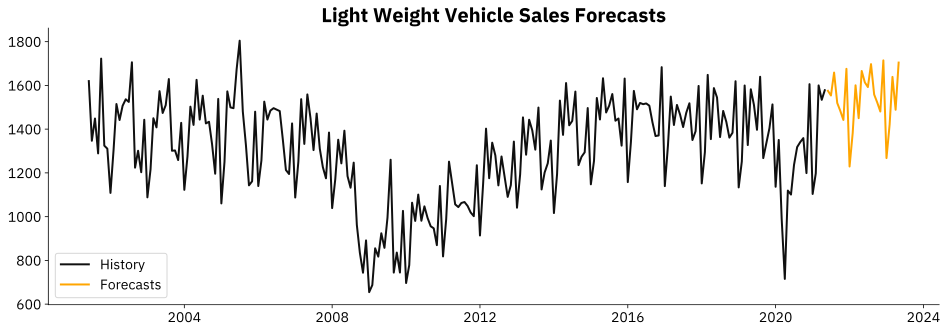

In [26]:
plt.figure(figsize=(16, 5))
plt.title('Light Weight Vehicle Sales Forecasts', size=20, weight="bold")
plt.plot(df[-240:], label='History')
plt.plot(forecasts, label='Forecasts', color='orange')
plt.legend()